In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("./Life_Expectancy_Data.csv")
pd.set_option('display.max_columns', None)
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under_five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5_9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
bel_df = df.loc[(df['Country'] =='Belgium')]
#& (df['Year'] != 2015)
bel_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under_five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5_9 years,Income composition of resources,Schooling
240,Belgium,2015,Developed,81.1,74.0,0,NaN,0.000000,98.0,47,63.7,1,99.0,NaN,99.0,0.1,4356.87500,11274196.0,1.0,1.0,0.895,16.6
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
242,Belgium,2013,Developed,87.0,77.0,0,11.77,702.359357,98.0,39,63.0,1,99.0,1.57,99.0,0.1,4651.38647,11182817.0,1.0,0.9,0.889,16.3
243,Belgium,2012,Developed,83.0,78.0,0,10.08,664.473897,98.0,109,62.6,1,99.0,1.54,99.0,0.1,4474.57170,11128246.0,0.9,0.9,0.886,16.2
244,Belgium,2011,Developed,83.0,8.0,0,10.11,713.529735,97.0,576,62.3,1,98.0,1.42,98.0,0.1,4772.77415,1147744.0,0.9,0.9,0.884,16.1
245,Belgium,2010,Developed,80.0,81.0,0,10.22,665.735612,97.0,40,61.9,1,98.0,1.17,98.0,0.1,4438.23741,1895586.0,0.9,0.9,0.878,15.9
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,61.6,1,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,61.3,1,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,6.9,1,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,6.6,1,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7


In [5]:
bel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 240 to 255
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          16 non-null     object 
 1   Year                             16 non-null     int64  
 2   Status                           16 non-null     object 
 3   Life expectancy                  16 non-null     float64
 4   Adult Mortality                  16 non-null     float64
 5   infant deaths                    16 non-null     int64  
 6   Alcohol                          15 non-null     float64
 7   percentage expenditure           16 non-null     float64
 8   Hepatitis B                      16 non-null     float64
 9   Measles                          16 non-null     int64  
 10  BMI                              16 non-null     float64
 11  under_five deaths                16 non-null     int64  
 12  Polio                

In [6]:
bel_df.shape

(16, 22)

In [7]:
corr_matrix = bel_df.corr() #compute the standard correlation coefficient

In [8]:
corr_matrix['Life expectancy'].sort_values(ascending=False) 
#cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
#If the values of the ith or jth variable do not vary, then the respective standard deviation will be zero and so will the denominator of the fraction. 
#Thus, the correlation will be NaN

Life expectancy                    1.000000e+00
thinness 1-19 years                8.350946e-01
Year                               7.944862e-01
thinness 5_9 years                 7.493229e-01
Income composition of resources    6.889383e-01
Diphtheria                         6.687218e-01
Polio                              6.188284e-01
Hepatitis B                        5.469880e-01
Population                         4.218636e-01
BMI                                2.733466e-01
Alcohol                            2.616686e-01
Measles                            2.516208e-01
percentage expenditure             1.536086e-01
GDP                                1.243333e-01
Adult Mortality                    3.007191e-02
HIV/AIDS                          -2.512269e-15
Schooling                         -4.005973e-01
infant deaths                     -4.683741e-01
Total expenditure                 -7.094057e-01
under_five deaths                           NaN
Name: Life expectancy, dtype: float64

In [9]:
# x and y defined as a numpy.ndaray
x = bel_df['Year'].values
y = bel_df['Life expectancy'].values

Text(0, 0.5, 'Life expectancy')

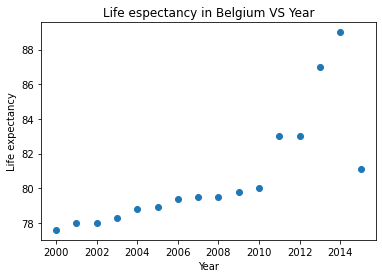

In [10]:
plt.scatter(x, y) 
plt.title("Life espectancy in Belgium VS Year")
plt.xlabel("Year")
plt.ylabel("Life expectancy")

In [11]:
from sklearn.model_selection import train_test_split
#split the data set
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [12]:
X_train

array([2002, 2004, 2007, 2006, 2013, 2000, 2011, 2008, 2005, 2003, 2012,
       2009], dtype=int64)

In [16]:
from sklearn.linear_model import LinearRegression
#Load and fit the model
regressor = LinearRegression() #Create a regressor variable and instantiate your LinearRegression class
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [17]:
# model score
regressor.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1)) 

0.7798849296201009

In [18]:
#testing the model
regressor.predict(X_test.reshape(-1, 1))

array([[85.15361011],
       [84.5631769 ],
       [82.20144404],
       [76.88754513]])

In [20]:
y_test

array([81.1, 89. , 80. , 78. ])

In [22]:
regressor.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

0.39546515927011694

In [23]:
#pipe.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

Text(0, 0.5, 'Life expectancy')

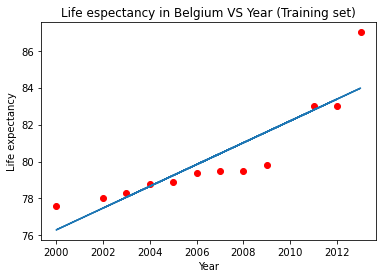

In [27]:
# Ploting
plt.plot( X_train, regressor.predict(X_train.reshape(-1, 1)))
plt.scatter( X_train, y_train, c='r')
plt.title("Life espectancy in Belgium VS Year (Training set)")
plt.xlabel("Year")
plt.ylabel("Life expectancy")

Text(0, 0.5, 'Life espectancy')

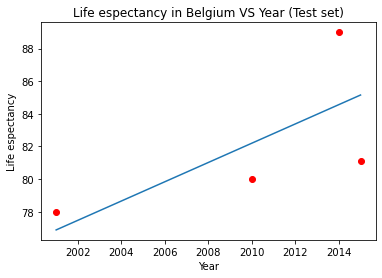

In [28]:
plt.plot( X_test, regressor.predict(X_test.reshape(-1, 1)))
plt.scatter( X_test, y_test, c='r')
plt.title("Life espectancy in Belgium VS Year (Test set)")
plt.xlabel("Year")
plt.ylabel("Life espectancy")

In [30]:
X_test1=np.array([2100])
regressor.predict(X_test1.reshape(-1, 1))

array([[135.34043321]])